In [932]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../modules")
from models import create_amatrix
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("../../../../Notes/cross_validation/meyers_latex.mplstyle")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1171]:
npoints = 11
Tspan = 16 * (365.25 * 86400)
freqs = np.log10(np.logspace(-np.log10(Tspan), -np.log10(Tspan/16), num=npoints))
Ai, b0_coeff, blast_coeff = create_amatrix(npoints - 2, freqs[1:-1], cond=0)
Ai_norm = np.array([Ai[:, ii] / np.max(Ai[:, ii]) for ii in range(Ai.shape[1])]).T
maxvals = np.array([np.max(Ai[:, ii]) for ii in range(Ai.shape[1])]).squeeze()
def make_b_from_betas(betas, b_0_val, b_last_val):
    b_vals = np.vstack([b_0_val, np.zeros((betas.size - 2, 1)),b_last_val])
    return b_vals.squeeze() + betas.squeeze()

In [1172]:
b_0 = -6
b_last = -8
true_vals = (freqs - freqs[0]) * (b_last - b_0) / (freqs[-1] - freqs[0]) + b_0
print(true_vals)

[-6.  -6.2 -6.4 -6.6 -6.8 -7.  -7.2 -7.4 -7.6 -7.8 -8. ]


In [1173]:
b_vals = make_b_from_betas(np.zeros(npoints-2), b_0 * b0_coeff, b_last*blast_coeff)
rhos = Ai @ b_vals
rhos_normed = Ai_norm @ (b_vals * maxvals)
rhos_total = np.r_[b_0, rhos, b_last]



print(freqs.shape)

(11,)


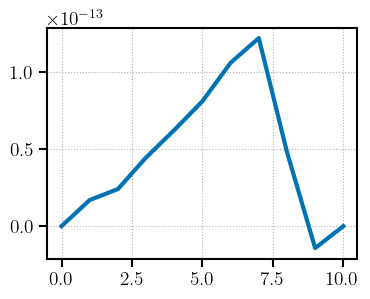

In [1174]:
plt.plot(true_vals - rhos_total)

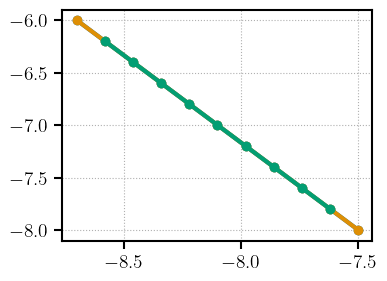

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.1204119982655925


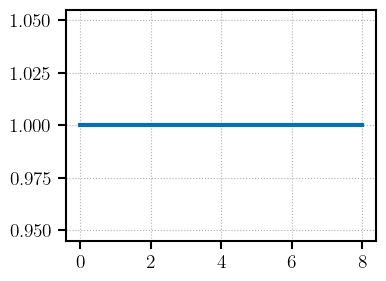

In [1175]:
plt.plot(freqs, true_vals, '-o')
plt.plot(freqs, rhos_total, '-o')
plt.plot(freqs[1:-1], rhos_normed, '-o')
plt.show()
plt.plot(rhos_total[1:-1] / rhos_normed)
print(rhos_total[1:-1] / rhos_normed)
print(np.mean(np.diff(freqs)))
plt.show()

[-5.4  0.   0.   0.   1.   0.   0.   0.  -7.2]
1.0


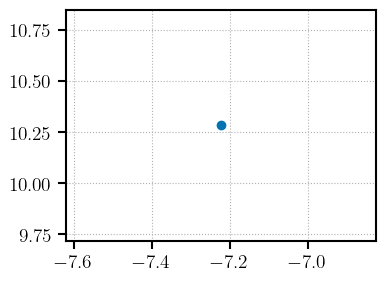

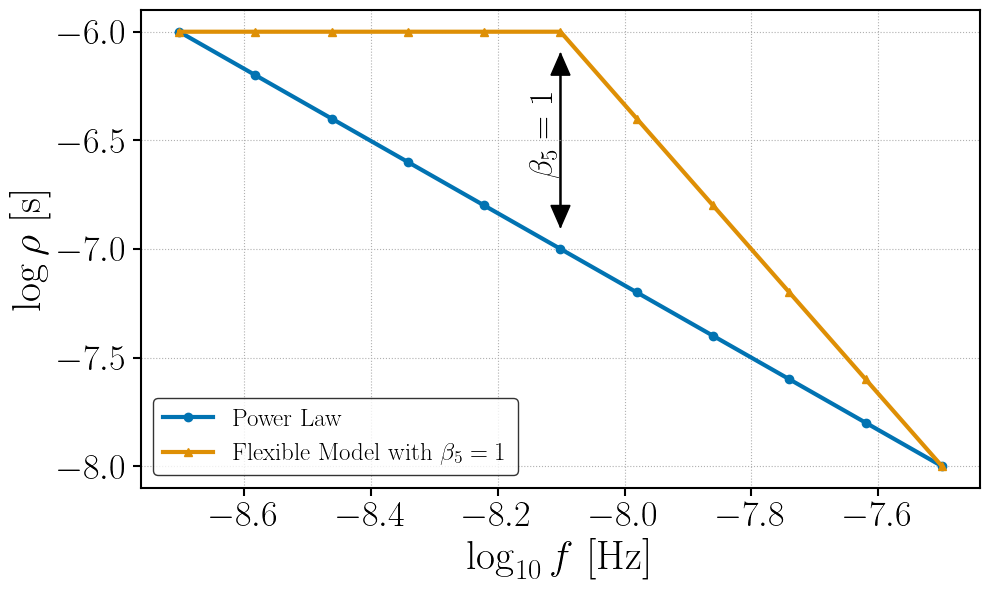

[0. 0. 0. 0. 1. 0. 0. 0. 0.]
second half slope, measured: -1.0802469135802413
original slope -1.1111111111111112
first half slope theor: 2.0


In [1176]:
# idxs = np.arange(10, 900)[::50]
idxs = [4]
ratios = []
for idx in idxs:
    beta = 1
    betas = np.zeros(npoints-2)
    betas[idx] += beta
    b_vals_new = make_b_from_betas(betas, maxvals[0] * b_0 * b0_coeff, b_last*blast_coeff * maxvals[-1])
    print(b_vals_new)
    print(maxvals[0])
    maxvals[1:-1] = 1
    rhos_new_total = Ai_norm @ ( b_vals_new)
    rhos_new = Ai @ b_vals_new
    
    
    ratios.append(((C - slope_original) / first_half_slope_diff))
ax = plt.gca()

plt.scatter(freqs[idxs]+1, ratios)
# plt.ylim(0.99, 1.05)
# plt.plot(freqs[idxs], np.array(idxs)**2 / 64)
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(freqs, true_vals, '-o', label='Power Law')
plt.plot(freqs, np.r_[true_vals[0], rhos_new_total, true_vals[-1]], '-^', label='Flexible Model with $\\beta_{5}=1$')

ax = plt.gca()
ax.tick_params(labelsize=26)
plt.xlabel('$\log_{10} f$ [Hz]', fontsize=30)
plt.ylabel('$\log \\rho$ [s]', fontsize=30)
plt.legend()
plt.tight_layout()
plt.arrow(freqs[idx+1], -6.9, 0, 0.7, head_length=0.1, head_width=0.03, facecolor='k')
plt.arrow(freqs[idx+1], -6.1, 0, -0.7, head_length=0.1, head_width=0.03, facecolor='k')
plt.text(-8.15, -6.65, '$\\beta_5=1$', fontsize=24, rotation=90)
plt.savefig("../plots/flexible_model_correct_betas.pdf")

plt.show()
print(betas)
print("second half slope, measured:", second_half_measured_slope)
print("original slope", slope_original)
print("first half slope theor:", first_half_slope_theoretical)

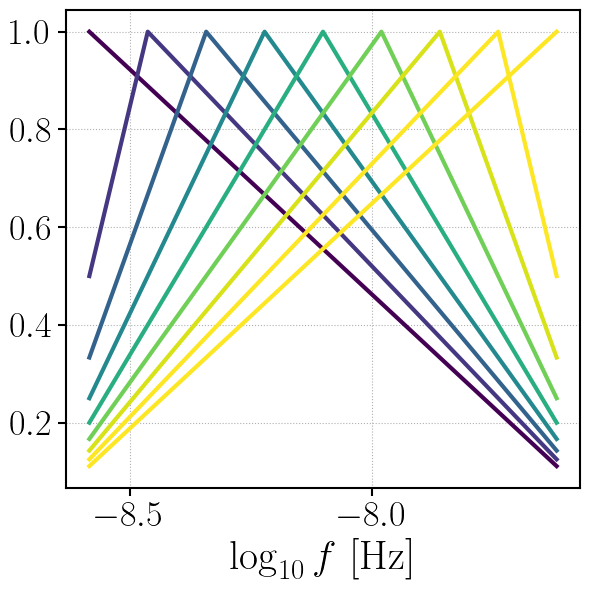

In [1177]:
cmap = plt.colormaps
plt.figure(figsize=(6, 6))
for ii in range(npoints-2):
    plt.plot(freqs[1:-1],Ai[:, ii], c=plt.cm.viridis(ii*40))
ax = plt.gca()
ax.tick_params(labelsize=26)
plt.xlabel('$\log_{10} f$ [Hz]', fontsize=30)
plt.tight_layout()
plt.savefig("../plots/a_columns.pdf")
plt.show()

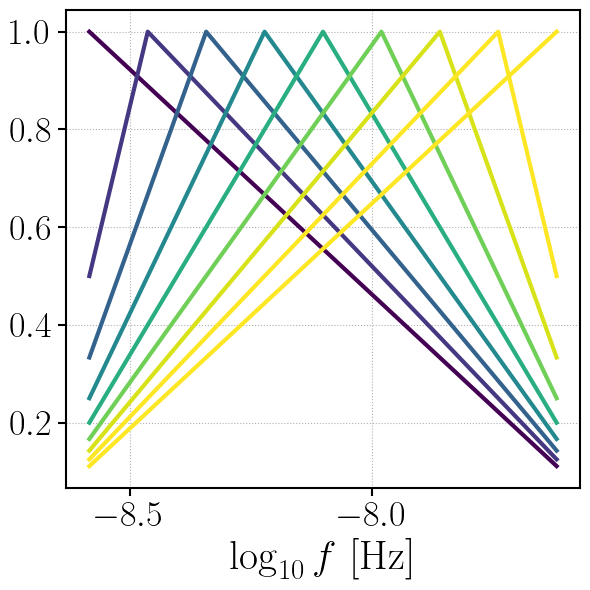

In [1178]:
plt.figure(figsize=(6, 6))
for ii in range(npoints-2):
    plt.plot(freqs[1:-1],Ai_norm2[:, ii], c=plt.cm.viridis(ii*40))
ax = plt.gca()
ax.tick_params(labelsize=26)
plt.xlabel('$\log_{10} f$ [Hz]', fontsize=30)
plt.tight_layout()
plt.savefig("../plots/aprime_columns.pdf")

plt.show()

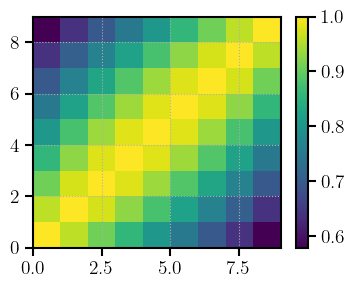

In [1179]:
covar_mat = np.zeros_like(Ai)
for ii in range(Ai.shape[0]):
    for jj in range(Ai.shape[0]):
        covar_mat[ii, jj] = np.dot(Ai[:, ii], Ai[:, jj]) / np.sqrt(np.dot(Ai[:, ii], Ai[:, ii]) * np.dot(Ai[:, jj], Ai[:, jj]))
plt.pcolormesh(covar_mat)
plt.colorbar()
plt.show()

In [1180]:
out = np.linalg.eigh(Ai)

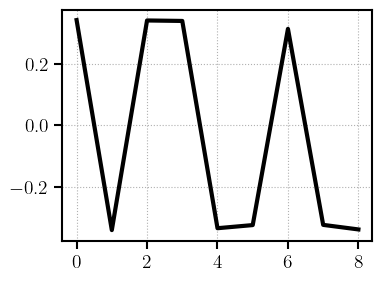

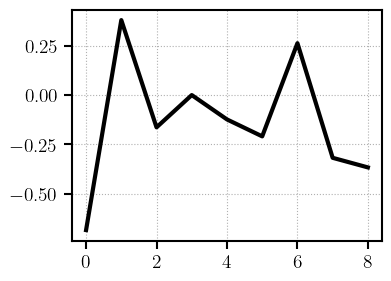

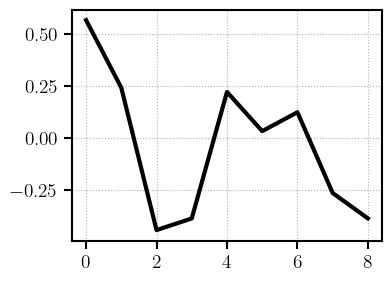

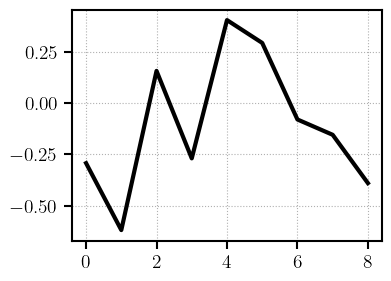

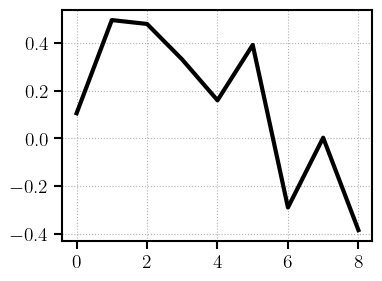

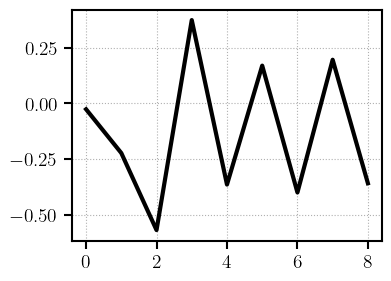

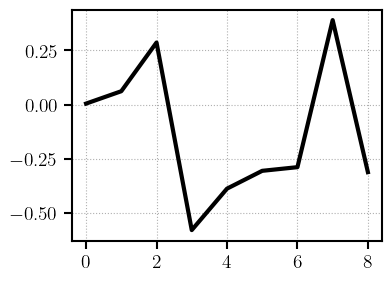

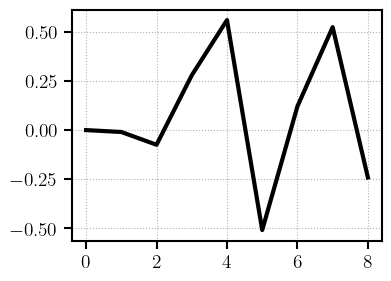

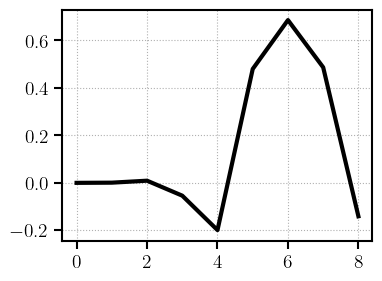

In [1181]:
for ii in range(Ai.shape[0]):
    plt.plot(out.eigenvectors[ii], c='k')
    plt.show()

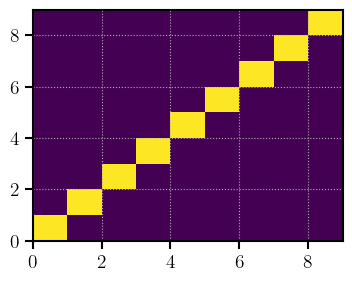

In [1182]:
plt.pcolormesh(out.eigenvectors @ out.eigenvectors.T)

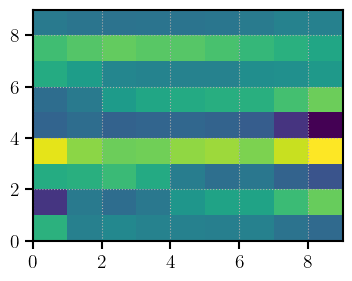

In [1193]:
Sigmainv = np.diag(out.eigenvalues**-1)
Aii = out.eigenvectors @ Sigmainv @ out.eigenvectors
plt.pcolormesh(Aii @ Ai)
plt.show()

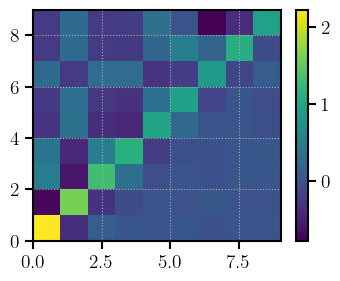

In [1188]:
plt.pcolormesh((out.eigenvectors.T @ Ai @ out.eigenvectors) / out.eigenvalues)
plt.colorbar()

In [1184]:
(out.eigenvectors.T @ Ai @ out.eigenvectors)

Array([[ 1.68424840e-01, -4.08146250e-02,  1.66650338e-02,
         4.28343596e-03,  5.18931561e-03,  1.22447538e-02,
        -2.52816929e-02,  2.67811459e-02,  8.98337130e-02],
       [-5.36600716e-02,  1.68569520e-01, -4.96332840e-02,
        -1.93807990e-02,  1.86805411e-03, -1.02773097e-02,
         2.97093567e-02, -3.22394737e-02, -1.20389428e-01],
       [ 3.62802483e-02, -6.26038153e-02,  1.92902034e-01,
         6.10382481e-02, -1.95013992e-02,  2.03526370e-03,
        -3.20623877e-02,  3.64200105e-02,  1.59430180e-01],
       [ 2.87505758e-02, -4.49883776e-02,  7.44642910e-02,
         2.38433144e-01, -7.71075525e-02, -1.93181830e-02,
        -2.67539133e-02,  3.68867357e-02,  2.12318564e-01],
       [-2.45085046e-02,  3.63361629e-02, -5.62525153e-02,
        -9.02559874e-02,  3.13777364e-01,  1.08362994e-01,
         8.51644251e-03, -2.11226988e-02, -2.85463639e-01],
       [-2.15114895e-02,  3.10665277e-02, -4.51545514e-02,
        -7.27523130e-02,  1.05839019e-01,  4.511727

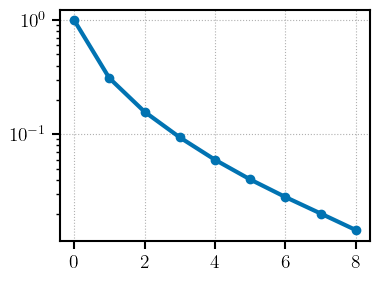

In [1185]:
plt.plot(out.eigenvalues[::-1]/ max(out.eigenvalues), '-o')
plt.yscale("log")

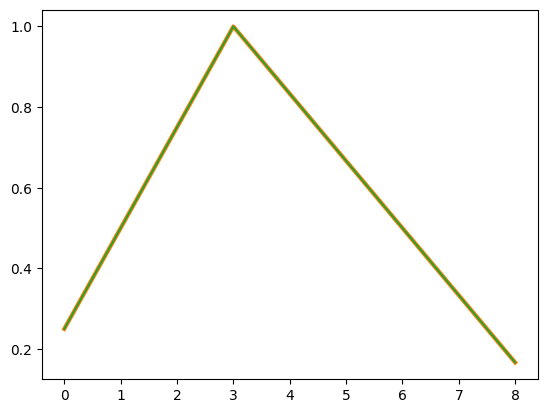

In [691]:
beta1 = np.zeros(Ai_norm.shape[0])
beta1[3] += 1
# plt.plot(Ai_norm @ beta1)
# plt.plot(Ai[:, 3] / np.max(Ai[:, 3]))
Ai_norm2 = np.array([Ai[:, ii] / np.max(Ai[:, ii]) for ii in range(npoints-2)]).T
plt.plot(Ai_norm2[:, 3])
for ii in range(npoints-2):
    Ai_norm2[:, ii] = Ai[:, ii] / np.max(Ai[:, ii])
    if ii == 3:
        plt.plot(Ai_norm2[:, ii], lw=3)
plt.plot(Ai_norm2[:, 3])
# plt.plot(Ai_norm2[:, 2])

In [694]:
betas

array([0., 0., 0., 0., 0., 0., 1., 0., 0.])

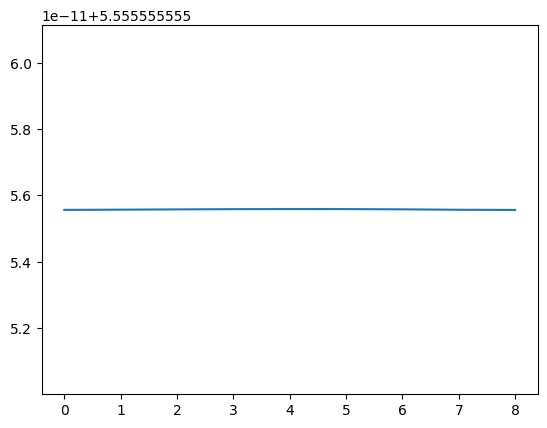

In [695]:
plt.plot(Ai_norm2 @ b_vals)

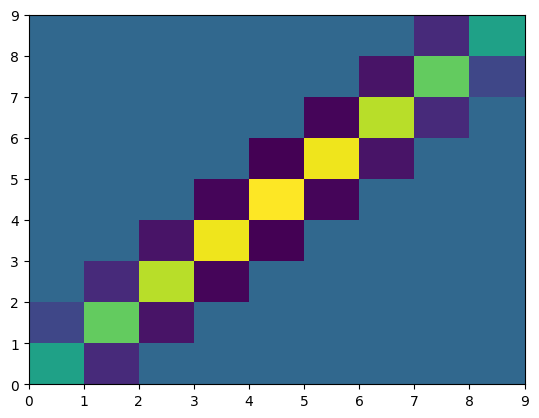

In [666]:
plt.pcolormesh(np.linalg.inv(np.array([Ai[:, ii] / np.max(Ai[:, ii]) for ii in range(Ai.shape[1])])))

In [668]:
print(np.linalg.inv(np.array([Ai[:, ii] / np.max(Ai[:, ii]) for ii in range(Ai.shape[1])])))

[[ 1.80000000e+00 -1.60000000e+00  5.19337659e-16 -2.65565347e-15
   9.43689571e-16  1.85629290e-15 -1.79189996e-15  5.59552404e-16
  -5.55111512e-17]
 [-9.00000000e-01  3.20000000e+00 -2.10000000e+00 -3.48610030e-16
  -1.39888101e-15  6.32827124e-16 -3.09752224e-16  5.26245714e-16
  -6.99440506e-17]
 [ 9.10382880e-16 -1.60000000e+00  4.20000000e+00 -2.40000000e+00
  -1.25613805e-15 -2.82440737e-15  2.55795385e-15  2.39808173e-16
  -8.45989945e-16]
 [-2.07334150e-15 -1.87812728e-15 -2.10000000e+00  4.80000000e+00
  -2.50000000e+00  1.37667655e-15 -2.83106871e-16 -1.22679644e-15
   1.14130927e-15]
 [ 3.49720253e-16  9.36288084e-16 -2.93653990e-15 -2.40000000e+00
   5.00000000e+00 -2.40000000e+00 -1.42774681e-15  6.19504448e-16
   1.53210777e-16]
 [ 8.24340596e-16 -9.34437712e-16 -1.30451205e-15  2.55795385e-15
  -2.50000000e+00  4.80000000e+00 -2.10000000e+00  1.66533454e-16
  -2.24820162e-16]
 [-4.44089210e-16  3.99680289e-16  3.41393580e-15 -4.11670698e-15
   1.59131967e-16 -2.4000000

In [650]:
print(np.max(Ai))

5.000000000000019


In [651]:
np.all(np.abs(Ai-Ai.T) < 1e-11)

True

In [652]:
measured_first_half_slope = (rhos_new[idx] - rhos_new[0]) / (freqs[idx] - freqs[0])
print('first half slope new:', measured_first_half_slope)

first half slope new: 0.6000000000000068


In [653]:
from scipy.integrate import odeint

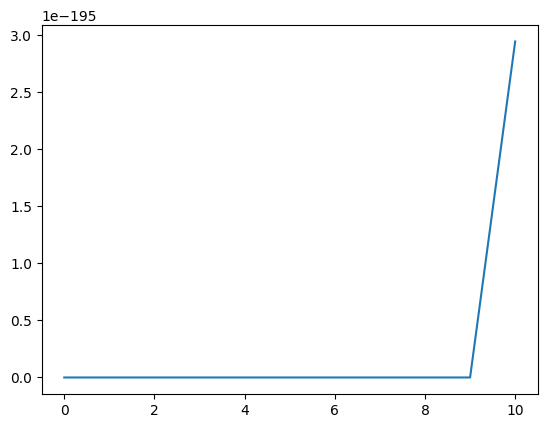

In [654]:
def gauss(t, mu, sigma, beta):
    return beta * (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-0.5 * (t - mu)**2 / sigma**2)
plt.plot(freqs, gauss(freqs, 13, 0.1, 2))

In [655]:
def dydt(y, t, k, sigma, mu, beta):
    dydt = y / t + k/t + gauss(t, mu, sigma, beta) / t
    return dydt

/var/folders/pw/q58shg_d4vz37qn56ds0zjm40000gn/T/ipykernel_49763/3214133002.py:2: RuntimeWarning: divide by zero encountered in divide
  dydt = y / t + k/t + gauss(t, mu, sigma, beta) / t
/var/folders/pw/q58shg_d4vz37qn56ds0zjm40000gn/T/ipykernel_49763/3214133002.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  dydt = y / t + k/t + gauss(t, mu, sigma, beta) / t
/var/folders/pw/q58shg_d4vz37qn56ds0zjm40000gn/T/ipykernel_49763/3214133002.py:2: RuntimeWarning: invalid value encountered in add
  dydt = y / t + k/t + gauss(t, mu, sigma, beta) / t
/var/folders/pw/q58shg_d4vz37qn56ds0zjm40000gn/T/ipykernel_49763/3214133002.py:2: RuntimeWarning: invalid value encountered in scalar divide
  dydt = y / t + k/t + gauss(t, mu, sigma, beta) / t


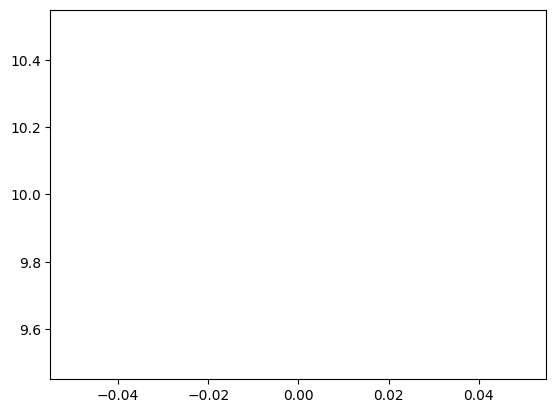

In [656]:
integrated_freqs = np.linspace(freqs[0], freqs[-1], num=10000)
kval = -true_vals[0] + (slope_original) * freqs[0]
pats = [odeint(dydt, true_vals[0], integrated_freqs, args=(kval, sigval, 10, 4), full_output=True) for sigval in [0.1]]
for pat in pats:
    plt.plot(integrated_freqs, pat[0], lw=4)
# plt.plot(freqs, true_vals, '-o')